# 简单的全球温度动态图
作者：邓楠 
dengnan987@gmail.com

## 导入包

In [3]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## ECMWF的api脚本，一次一个

> import cdsapi
>
>c = cdsapi.Client()
>
>c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'temperature',
        'pressure_level': '1000',
        'year': '1998',
        'month': '06',
        'day': '08',
        'time': [
            '08:00', '10:00', '12:00',
            '14:00', '16:00', '18:00',
        ],
        'format': 'netcdf',
    },
    'download.nc')
    
 * 批量下载可写另外的脚本，见csdn[孤城_001](https://blog.csdn.net/u011620268/article/details/97560996?utm_medium=distribute.pc_relevant_download.none-task-blog-blogcommendfrombaidu-2.nonecase&depth_1-utm_source=distribute.pc_relevant_download.none-task-blog-blogcommendfrombaidu-2.nonecas)

In [4]:
import os
rootdir = './'  #数据的文件夹
list = os.listdir(rootdir)   #把所有文件的名字读入到list里
list

['temp3.png',
 'adaptor.mars.internal-1603704413.1836874-2428-33-d2c83ee7-bc6b-4966-b17c-1415b870ec10.nc',
 'temp5.png',
 'temp4.png',
 'temp.gif',
 'temp0.png',
 'temp2.png',
 'nc打开文档.ipynb',
 'Global_Temperature.ipynb',
 'temp1.png',
 '.ipynb_checkpoints',
 'atmos-alice',
 '.empty']

In [7]:
ds = xr.open_dataset(rootdir+list[1],decode_times=False)
temp = ds.t-273.15  # 将K转换摄氏度温度
ds.t.shape

(6, 721, 1440)

In [8]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 6)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) int32 862856 862858 862860 862862 862864 862866
Data variables:
    t          (time, latitude, longitude) float32 273.307 273.307 ... 244.91862
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-26 09:26:54 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

## 看每个纬度的最大温度值为多少

In [11]:
a = temp[1,:,:].max(axis=1)
a

<xarray.DataArray 't' (latitude: 721)>
array([ 2.39410400e-01,  3.20526123e-01,  4.48150635e-01,  5.26580811e-01,
        5.39855957e-01,  5.19927979e-01,  5.06622314e-01,  5.45196533e-01,
        5.57159424e-01,  5.81085205e-01,  5.99700928e-01,  6.72821045e-01,
        6.82128906e-01,  6.31591797e-01,  6.47552490e-01,  6.84783936e-01,
        6.82128906e-01,  7.07366943e-01,  7.47253418e-01,  7.24670410e-01,
        5.78430176e-01,  6.03668213e-01,  6.84783936e-01,  6.70166016e-01,
        5.91705322e-01,  1.09423828e+00,  2.17105103e+00,  2.90225220e+00,
        4.46963501e+00,  5.14099121e+00,  5.51586914e+00,  5.04925537e+00,
        4.97082520e+00,  5.63552856e+00,  5.94927979e+00,  5.89477539e+00,
        5.78042603e+00,  5.99713135e+00,  6.07821655e+00,  7.15902710e+00,
        7.66687012e+00,  6.55548096e+00,  6.11410522e+00,  5.91204834e+00,
        5.83227539e+00,  6.18856812e+00,  6.56878662e+00,  6.86788940e+00,
        7.22549438e+00,  6.83065796e+00,  6.76287842e+00,  7.16702271e+00,
        7.38369751e+00,  7.28930664e+00,  7.38369751e+00,  7.23348999e+00,
        6.68576050e+00,  6.76022339e+00,  7.71737671e+00,  8.61209106e+00,
        7.72537231e+00,  6.62725830e+00,  6.83865356e+00,  6.84396362e+00,
        6.74291992e+00,  6.73095703e+00,  6.85192871e+00,  7.36642456e+00,
        8.08828735e+00,  8.61343384e+00,  8.74636841e+00,  8.89126587e+00,
        1.05516968e+01,  1.19422913e+01,  1.31959229e+01,  1.52019958e+01,
        1.74248047e+01,  1.85281982e+01,  1.97153625e+01,  2.06473083e+01,
        2.05356140e+01,  2.06818542e+01,  2.17108459e+01,  2.33420410e+01,
        2.46820679e+01,  2.50277405e+01,  2.46222534e+01,  2.46235962e+01,
        2.48761902e+01,  2.52856445e+01,  2.52524109e+01,  2.70550842e+01,
        2.72784424e+01,  2.83605652e+01,  2.84403381e+01,  2.81837769e+01,
        2.79458008e+01,  2.75469666e+01,  2.66083984e+01,  2.60925903e+01,
        2.60420837e+01,  2.62853699e+01,  2.67626038e+01,  2.68397217e+01,
        2.75429993e+01,  2.77543640e+01,  2.74991150e+01,  2.76799011e+01,
        2.80003052e+01,  2.74592285e+01,  2.66934814e+01,  2.64342346e+01,
        2.66549377e+01,  2.66389771e+01,  2.61045532e+01,  2.62919922e+01,
        2.66456299e+01,  2.66310120e+01,  2.67347107e+01,  2.69101868e+01,
        2.71760559e+01,  2.75961609e+01,  2.75576172e+01,  2.72518311e+01,
        2.68384094e+01,  2.64049988e+01,  2.61085510e+01,  2.60606995e+01,
        2.62002869e+01,  2.59317322e+01,  2.58067627e+01,  2.57004089e+01,
        2.63292236e+01,  2.73834534e+01,  2.85373840e+01,  2.90186462e+01,
        2.82289734e+01,  2.86277771e+01,  2.86397400e+01,  2.82874451e+01,
        2.90651550e+01,  2.97192383e+01,  3.00609131e+01,  2.99811401e+01,
        3.04264832e+01,  3.07508545e+01,  3.07960510e+01,  3.05554504e+01,
        3.02098083e+01,  2.99784851e+01,  3.03360901e+01,  3.06737671e+01,
        3.05421448e+01,  3.07388916e+01,  3.21042175e+01,  3.21334534e+01,
        3.12440796e+01,  3.14208984e+01,  3.22836914e+01,  3.24512024e+01,
        3.18915100e+01,  3.21587219e+01,  3.25588684e+01,  3.29457397e+01,
        3.36662903e+01,  3.42100220e+01,  3.43987732e+01,  3.40358582e+01,
        3.39068909e+01,  3.40557861e+01,  3.42073364e+01,  3.45410461e+01,
        3.49132690e+01,  3.49066162e+01,  3.50714722e+01,  3.55633545e+01,
        3.59302673e+01,  3.56630554e+01,  3.54397278e+01,  3.54383850e+01,
        3.55195007e+01,  3.56045532e+01,  3.54317322e+01,  3.57335205e+01,
        3.56431274e+01,  3.54144592e+01,  3.54649658e+01,  3.52522583e+01,
        3.57667542e+01,  3.57853699e+01,  3.61642456e+01,  3.62639465e+01,
        3.58052979e+01,  3.61257019e+01,  3.72490540e+01,  3.74989929e+01,
        3.74670715e+01,  3.76864319e+01,  3.81876221e+01,  3.82075500e+01,
        3.80945740e+01,  3.72862854e+01,  3.68794861e+01,  3.69047241e+01,
        3.71254272e+01,  3.74085999e+01,  3.70323486e+01,  3.71746216e+01,
        3.74803772e+01,  3.69632263e+01,  3.85159912e+01,  3.

## 画图

/usr/local/anaconda3/envs/pychong/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:305: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/anaconda3/envs/pychong/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:341: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/usr/local/anaconda3/envs/pychong/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:317: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/usr/local/anaconda3/envs/pychong/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:329: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle

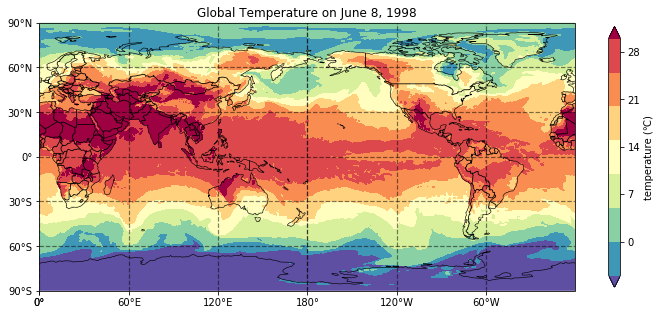

In [6]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'temperature (℃)',
   'shrink': 0.6,
   'ticks': np.arange(-35,39,7)
}
levels = np.arange(-5,35,5)
temp[0,:,:].plot.contourf(ax=ax, levels=levels, cmap='Spectral_r', 
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("Global Temperature on June 8, 1998")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)

#fig.show()
plt.savefig('temp{i}.png')

## 循环画图

/usr/local/anaconda3/envs/pychong/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:305: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/anaconda3/envs/pychong/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:341: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/usr/local/anaconda3/envs/pychong/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:317: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/usr/local/anaconda3/envs/pychong/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:329: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle

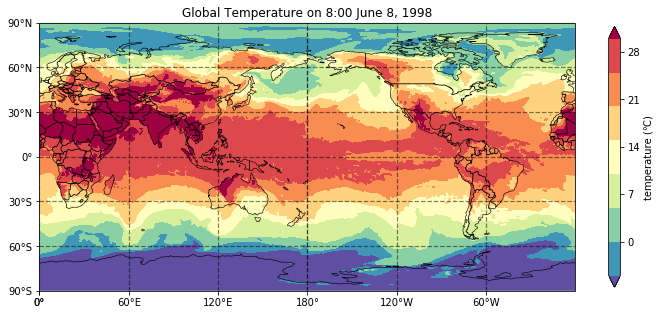

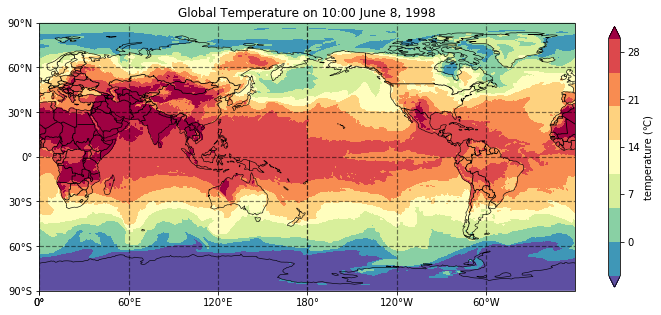

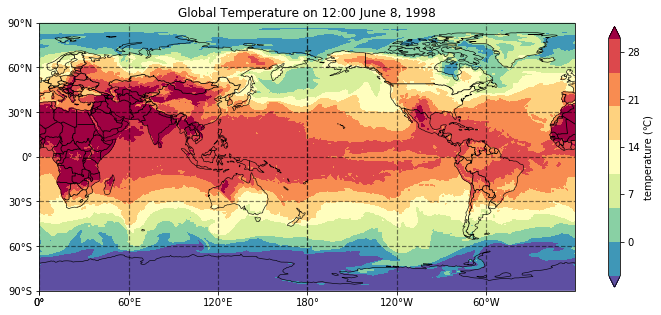

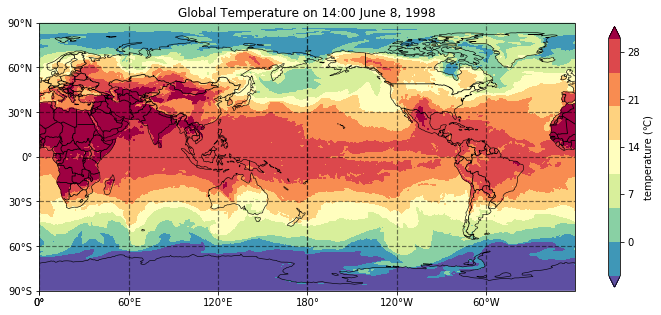

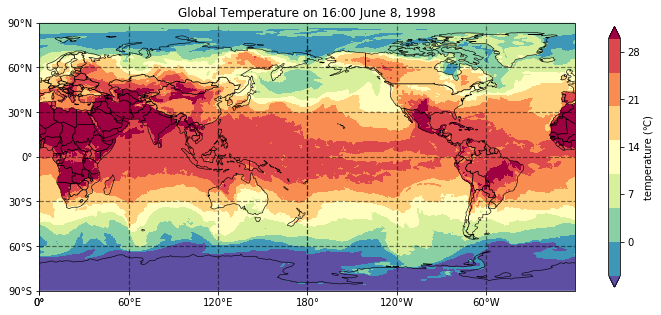

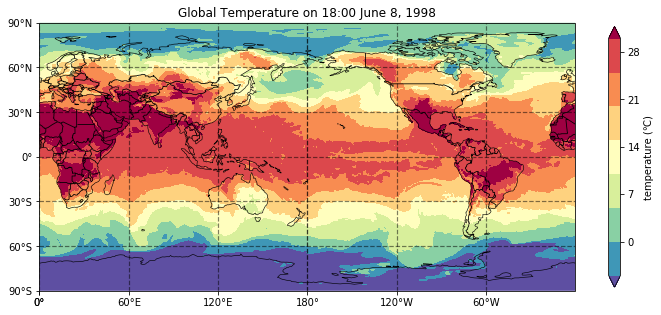

In [16]:
image_list=[]

for i in range(6):
    proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
    fig = plt.figure(figsize=(12,8))  #创建页面
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
    # 设置地图属性:加载国界、海岸线
    ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
    ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
    # 标注坐标轴
    ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    #网格点属性
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
        linewidth=1.2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False #关闭顶端标签
    gl.ylabels_right = False #关闭右侧标签
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    # zero_direction_label用来设置经度的0度加不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    # 设置colorbar
    cbar_kwargs = {
       'orientation': 'vertical',
       'label': 'temperature (℃)',
       'shrink': 0.6,
       'ticks': np.arange(-35,39,7)
    }
    levels = np.arange(-5,35,5)
    temp[i,:,:].plot.contourf(ax=ax, levels=levels, cmap='Spectral_r', 
                              cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
    ax.set_title('Global Temperature on {}:00 June 8, 1998'.format(2*i+8))  # Add a title to the axes.
    plt.xlabel(None)
    plt.ylabel(None)

    #fig.show()
    image_list.append('temp{}.png'.format(i))
    plt.savefig('temp{}.png'.format(i))

## 6张图片转gif

In [37]:
import imageio

In [38]:
def create_gif(image_list, gif_name, duration=0.35):
    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name, frames, 'GIF', duration=duration)
    return

def main():
    #image_list = []
    gif_name = 'temp.gif'
    duration = 0.35
    create_gif(image_list, gif_name, duration)

In [39]:
if __name__ == '__main__':
    main()

## 蟹蟹 